In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
dt=pd.read_csv('/content/ML+01+Logistic+Regession+Dataset+1.csv')

In [ ]:
# Here we will check how our data looks
dt.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [ ]:
# Now we will check the shape of the data.
dt.shape

(4000, 19)

In [ ]:
dt.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [ ]:
dt.dtypes
# Car insurance is the target variable

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [ ]:
# Here we will see the duplicate values in our dataset.
dt.duplicated().sum()

0

In [ ]:
# Here we will check the null values in our dataset
(dt.isnull().sum())/len(dt)*100

Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

In [ ]:
dt['Job'].nunique()

11

In [ ]:
dt.drop('Id',axis=1,inplace=True)

In [ ]:
dt.drop('Outcome',axis=1,inplace=True)

In [ ]:
dt['Job'].unique()

array(['management', 'blue-collar', 'student', 'technician', 'admin.',
       'services', 'self-employed', 'retired', nan, 'housemaid',
       'entrepreneur', 'unemployed'], dtype=object)

In [ ]:
dt['Job'].value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [ ]:
dt['Education'].unique()

array(['tertiary', 'primary', 'secondary', nan], dtype=object)

In [ ]:
dt['Communication'].unique()

array(['telephone', nan, 'cellular'], dtype=object)

In [ ]:
#dt['Outcome'].unique()

In [ ]:
dt['Job'].mode()[0]

'management'

In [ ]:
#dt['Job']=dt['Job'].fillna(dt['Job'].mode()[0])
dt['Job']=dt['Job'].replace(to_replace=['student','retired'],value='unemployed',inplace=True)
dt['Job']=dt['Job'].replace(to_replace=['entrepreneur'],value='self-employed',inplace=True)
dt['Job']=dt['Job'].replace(to_replace=['housemaid','technician'],value='services',inplace=True)

In [ ]:
dt.isnull().sum()

Age                    0
Job                 4000
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [ ]:
dt['Education'].unique()

array(['tertiary', 'primary', 'secondary', nan], dtype=object)

In [ ]:
dt['Education']=dt['Education'].fillna(dt['Education'].mode()[0])
dt['Communication']=dt['Communication'].fillna('telephone')

In [ ]:
dt['Communication'].value_counts()

cellular     2831
telephone    1169
Name: Communication, dtype: int64

In [ ]:
dt.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,32,None,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0
1,32,None,married,primary,0,1156,1,0,telephone,26,may,5,-1,0,14:49:03,14:52:08,0
2,29,None,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1
3,25,None,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1
4,30,None,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0


In [ ]:
dt.dtypes

Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [ ]:
dt.corr()['CarInsurance']

<ipython-input-30-c030847bfd46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt.corr()['CarInsurance']


Age               0.039158
Default          -0.039506
Balance           0.041561
HHInsurance      -0.203419
CarLoan          -0.092131
LastContactDay   -0.061271
NoOfContacts     -0.114884
DaysPassed        0.138943
PrevAttempts      0.148763
CarInsurance      1.000000
Name: CarInsurance, dtype: float64

In [ ]:
#dt.drop('CallStart',axis=1,inplace=True)
#dt.drop('CallEnd',axis=1,inplace=True)

In [ ]:
dt['Balance'].value_counts()

 0       309
 1        14
 2        13
 3        13
 5        11
        ... 
 2387      1
 2763      1
-59        1
 827       1
-400       1
Name: Balance, Length: 2178, dtype: int64

In [ ]:
dt['Balance']=pd.cut(dt['Balance'],bins=[-4000,0,5000,100000],labels=['Null','mid','high'])

In [ ]:
dt['Balance'].value_counts()

mid     3147
Null     574
high     279
Name: Balance, dtype: int64

In [ ]:
dt['NoOfContacts'].value_counts()

1     1685
2     1085
3      516
4      237
5      166
6       88
7       49
8       41
9       20
10      18
11      15
17      11
12      11
13       8
14       7
25       4
20       4
21       4
22       3
23       3
15       3
19       3
16       3
24       3
18       3
43       1
41       1
30       1
38       1
28       1
29       1
32       1
26       1
34       1
27       1
Name: NoOfContacts, dtype: int64

In [ ]:
dt['NoOfContacts']=pd.cut(dt['NoOfContacts'],bins=[-1,1,3,44],labels=['Normal','mid','high'])

In [ ]:
dt['DaysPassed'].value_counts()

-1      3042
 92       38
 182      33
 183      24
 91       24
        ... 
 212       1
 226       1
 76        1
 388       1
 40        1
Name: DaysPassed, Length: 330, dtype: int64

In [ ]:
dt['DaysPassed']=pd.cut(dt['DaysPassed'],bins=[-2,-1,900],labels=['past','present'])

In [ ]:
dt['PrevAttempts'].value_counts()

0     3042
1      335
2      251
3      125
4       79
5       60
6       25
7       21
8       18
10      10
9        9
12       5
14       5
13       4
19       4
11       3
30       1
23       1
18       1
58       1
Name: PrevAttempts, dtype: int64

In [ ]:
dt['PrevAttempts']=pd.cut(dt['PrevAttempts'],bins=[-1,0,60],labels=[0,1])

In [ ]:
dt['CallStart']=pd.to_datetime(dt['CallStart'])
dt['CallEnd']=pd.to_datetime(dt['CallEnd'])
dt['CallStart'].dt.minute
dt['CallEnd'].dt.minute
dt['duration']=dt['CallEnd'].dt.minute-dt['CallStart'].dt.minute
dt['duration']

0        1
1        3
2        6
3       14
4        3
        ..
3995     4
3996     2
3997     4
3998     2
3999     5
Name: duration, Length: 4000, dtype: int64

In [ ]:
dt['PrevAttempts'].value_counts()

0    3042
1     958
Name: PrevAttempts, dtype: int64

In [ ]:
dt['DaysPassed'].value_counts()

past       3042
present     958
Name: DaysPassed, dtype: int64

In [ ]:
dt.drop(['CallStart','CallEnd','LastContactMonth','Default'],axis=1,inplace=True)

In [ ]:
dt['Balance']=dt['Balance'].astype('object')
dt['NoOfContacts']=dt['NoOfContacts'].astype('object')
dt['DaysPassed']=dt['DaysPassed'].astype('object')
dt['PrevAttempts']=dt['PrevAttempts'].astype(int)

In [ ]:
dt.dtypes

Age                int64
Job               object
Marital           object
Education         object
Balance           object
HHInsurance        int64
CarLoan            int64
Communication     object
LastContactDay     int64
NoOfContacts      object
DaysPassed        object
PrevAttempts       int64
CarInsurance       int64
duration           int64
dtype: object

In [ ]:
dt.head()

,Age,Job,Marital,Education,Balance,HHInsurance,CarLoan,Communication,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,duration
0,32,None,single,tertiary,mid,1,0,telephone,28,mid,past,0,0,1
1,32,None,married,primary,mid,1,0,telephone,26,high,past,0,0,3
2,29,None,single,tertiary,mid,1,0,cellular,3,Normal,present,1,1,6
3,25,None,single,primary,mid,1,0,cellular,11,mid,past,0,1,14
4,30,None,married,tertiary,mid,0,0,cellular,3,Normal,past,0,0,3


In [ ]:
dt_num=dt.select_dtypes(include=np.number)
dt_cat=dt.select_dtypes(include='object')

In [ ]:
dt_dummy=pd.get_dummies(dt_cat,drop_first=True)
dt_dummy

,Marital_married,Marital_single,Education_secondary,Education_tertiary,Balance_high,Balance_mid,Communication_telephone,NoOfContacts_high,NoOfContacts_mid,DaysPassed_present
0,0,1,0,1,0,1,1,0,1,0
1,1,0,0,0,0,1,1,1,0,0
2,0,1,0,1,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0
4,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,0,1,0,1,0,0,0,0,0,1
3996,0,0,1,0,0,1,0,1,0,0
3997,0,1,1,0,0,0,0,0,0,0
3998,0,1,0,1,0,1,0,0,0,1


In [ ]:
data=pd.concat([dt_num,dt_dummy],axis=1)
data

,Age,HHInsurance,CarLoan,LastContactDay,PrevAttempts,CarInsurance,duration,Marital_married,Marital_single,Education_secondary,Education_tertiary,Balance_high,Balance_mid,Communication_telephone,NoOfContacts_high,NoOfContacts_mid,DaysPassed_present
0,32,1,0,28,0,0,1,0,1,0,1,0,1,1,0,1,0
1,32,1,0,26,0,0,3,1,0,0,0,0,1,1,1,0,0
2,29,1,0,3,1,1,6,0,1,0,1,0,1,0,0,0,1
3,25,1,0,11,0,1,14,0,1,0,0,0,1,0,0,1,0
4,30,0,0,3,0,0,3,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,1,0,25,1,1,4,0,1,0,1,0,0,0,0,0,1
3996,49,1,1,29,0,0,2,0,0,1,0,0,1,0,1,0,0
3997,27,0,1,8,0,0,4,0,1,1,0,0,0,0,0,0,0
3998,36,1,0,29,1,0,2,0,1,0,1,0,1,0,0,0,1


In [ ]:
x=data.drop(['CarInsurance'],axis=1)
y=data['CarInsurance']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train2=sc.fit_transform(x_train)
x_test2=sc.fit_transform(x_test)
x_train2

array([[ 2.22841144, -0.97460798, -0.38655567, ..., -0.46341185,
        -0.81710423,  1.83340413],
       [-0.5278027 , -0.97460798, -0.38655567, ...,  2.1579077 ,
        -0.81710423,  1.83340413],
       [-0.26940763,  1.02605357, -0.38655567, ..., -0.46341185,
         1.22383408, -0.54543348],
       ...,
       [-0.70006609, -0.97460798, -0.38655567, ...,  2.1579077 ,
        -0.81710423, -0.54543348],
       [ 0.76417267,  1.02605357, -0.38655567, ..., -0.46341185,
        -0.81710423, -0.54543348],
       [-0.09714424, -0.97460798, -0.38655567, ..., -0.46341185,
         1.22383408, -0.54543348]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train2,y_train)
y_pred = lr.predict(x_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)
accuracy

0.6866666666666666

In [ ]:
from sklearn.metrics import roc_auc_score,confusion_matrix
roc_auc=roc_auc_score(y_test,lr.predict_proba(x_test2)[:,1])
roc_auc
print(roc_auc)
confusion_matrix(y_test,y_pred)

0.720753934287826


array([[579, 154],
       [222, 245]])

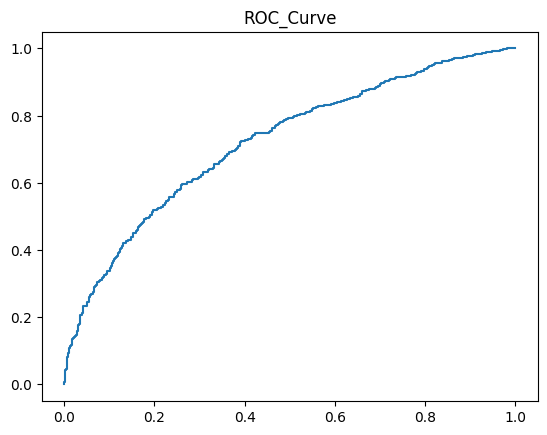

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(x_test2)[:,1])
plt.title('ROC_Curve')
plt.plot(fpr,tpr)

In [ ]:
f1_score(y_test,y_pred)

0.5658198614318706

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       733
           1       0.61      0.52      0.57       467

    accuracy                           0.69      1200
   macro avg       0.67      0.66      0.66      1200
weighted avg       0.68      0.69      0.68      1200



<Axes: title={'center': 'CarInsurance'}, xlabel='CarInsurance', ylabel='count'>

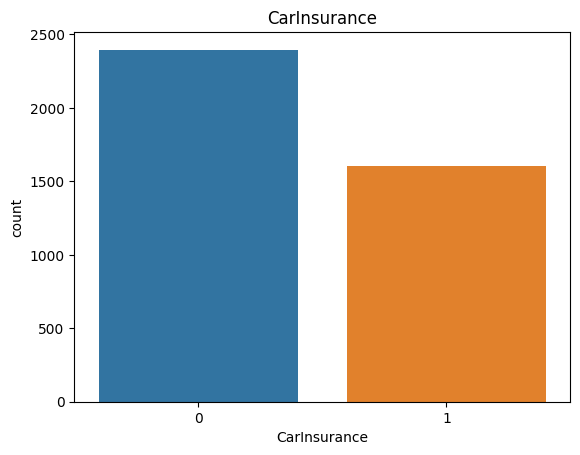

In [ ]:
plt.title('CarInsurance')
sns.countplot(data=dt,x='CarInsurance')

<Axes: >

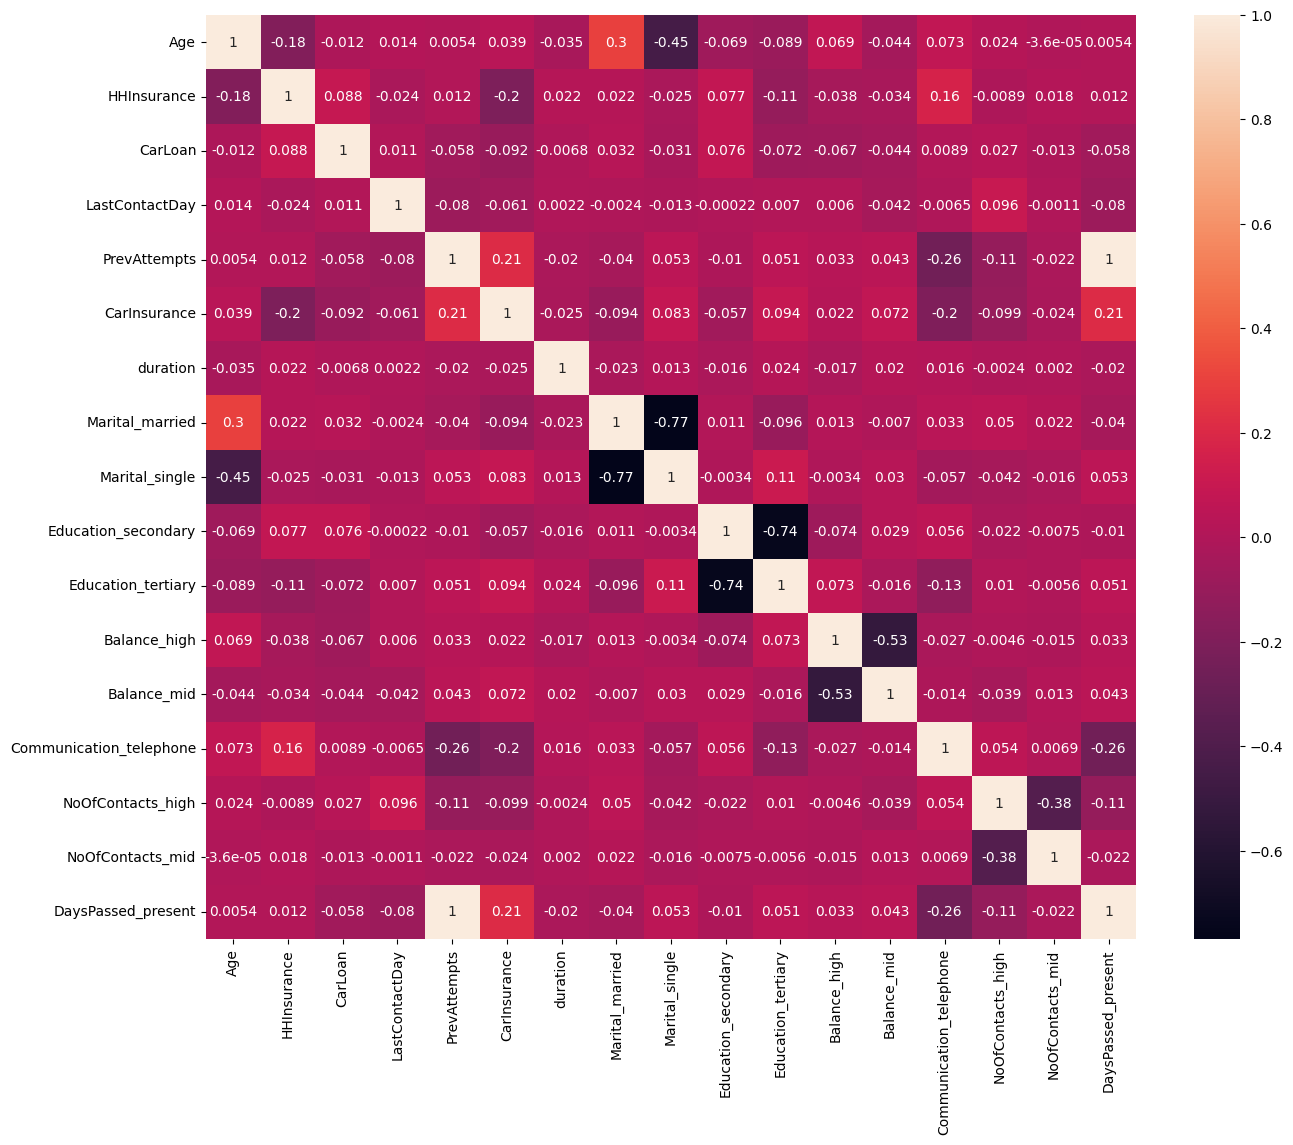

In [ ]:
plt.figure(figsize=(15,12)),
sns.heatmap(data.corr(),annot=True)
# Correlation of 0.77 between marital_married and marital_single
# Correlation of 0.74 between Education_tertiary and Education_secondary

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data
vif_data['Feature']=data.columns
vif_data
vif_data['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Age,9.748110
1,HHInsurance,2.030461
2,CarLoan,1.184405
3,LastContactDay,4.260721
4,PrevAttempts,inf
5,CarInsurance,1.885358
6,duration,1.004291
7,Marital_married,4.921211
8,Marital_single,2.984589
9,Education_secondary,4.173786


In [ ]:
data.drop('Marital_married',axis=1,inplace=True)

In [ ]:
data.drop('Education_secondary',axis=1,inplace=True)

<Axes: >

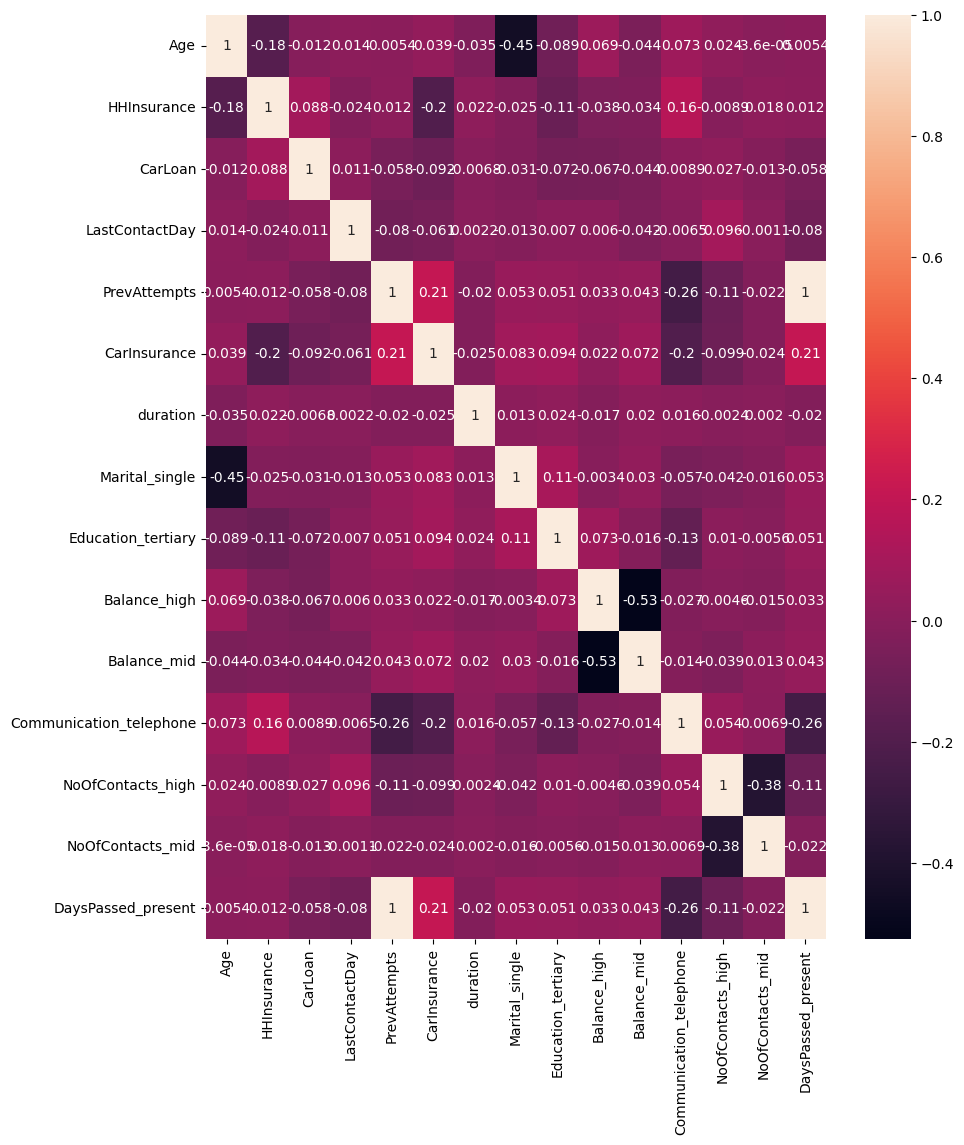

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='CarInsurance', ylabel='count'>

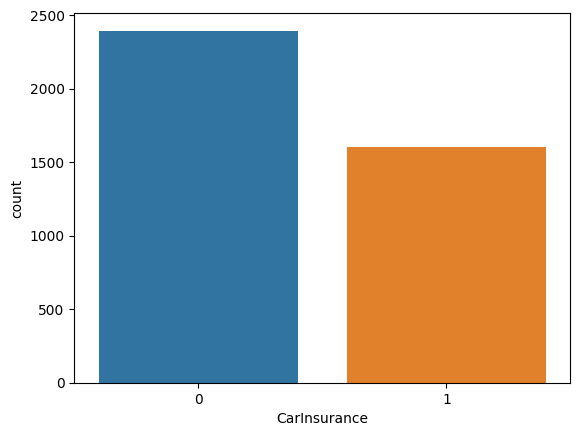

In [ ]:
#dr.groupby(['employment_type','remote_ratio'])['salary'].agg(['mean','max','min','sum'])
sns.countplot(data=dt,x='CarInsurance')

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)
accuracy

0.6866666666666666